# Analysing and plotting genetic allele frequency data using pandas, seaborn and matplotlib

In [50]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from upsetplot import plot

In [95]:
# Set constants and functions

home_path = str(os.path.dirname(os.getcwd()))
population_clusters = ["SUPER","SUB"]

gene_location_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "locations.csv"))
genes = gene_location_df.location_name

sample_info_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "samples.csv"))
sub_populations = sample_info_df.SUB.unique()
regional_classification = {"ACB":"ACB","ASW":"ASW","GWD":"WA","ESN":"WA","MSL":"WA","MbutiPygmy":"CA","BiakaPygmy":"CA","Mandenka":"WA","Yoruba":"WA","San":"KS","BantuSouthAfrica":"SA","BantuKenya":"EA","YRI":"WA","LWK":"EA"} # SA = South Africa, CA = Central Africa, WA = West Africa, EA = East Africa, ACB = African Carribean in Barbados, ASW = African American, KS = Khoi-San

## Set figure area and font size
sns.set(rc={"figure.figsize": (12, 10)})
SMALL_font = 8
MEDIUM_font = 10
BIGGER_font = 16

plt.rc('font', size=SMALL_font)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_font)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_font)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_font)  # fontsize of the figure title

## Create barplot of variant count per gene

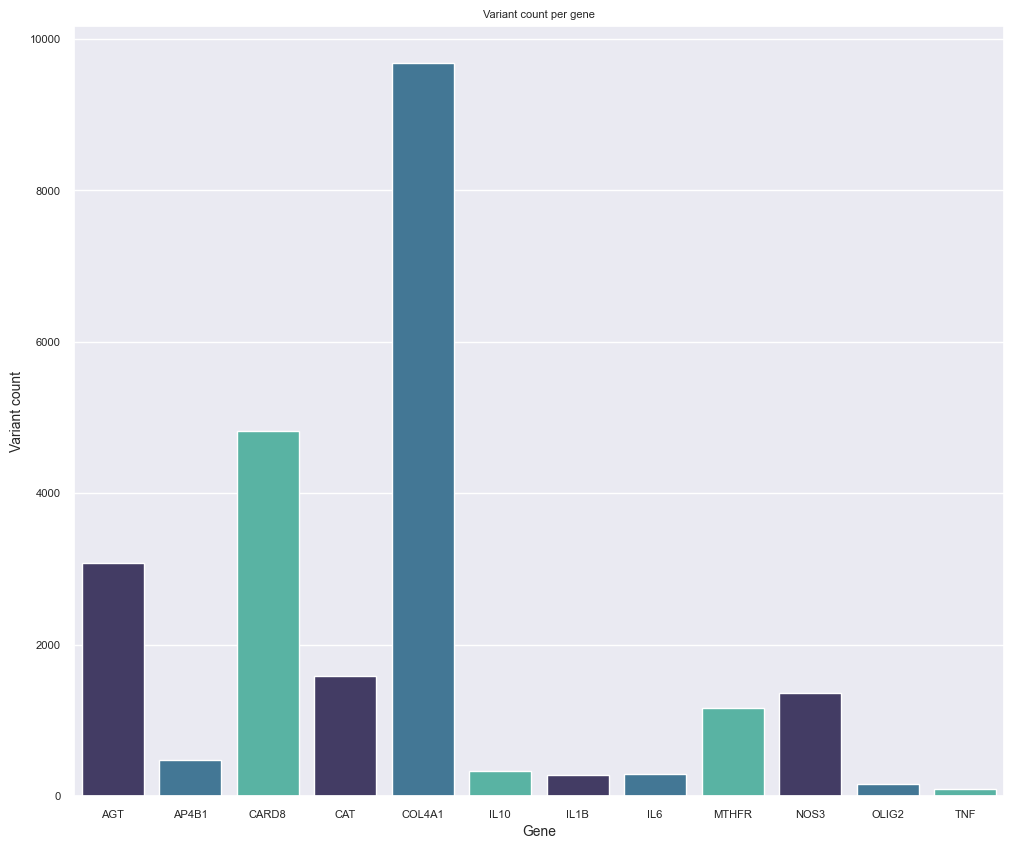

In [52]:
# Generate barplot of variant count per gene

# Import allele count data as pandas dataframe, calculate reference allele counts (reference allele count = total observed count - alternate allele count) and format dataframe correctly
collated_count_data = pd.DataFrame()
for gene in genes:
    allele_count_path = os.path.join(home_path,"Data", "SUPER", "ALL_{}.AFR.acount".format(gene))
    if os.path.exists(allele_count_path):
        allele_count_df = pd.read_csv(allele_count_path, sep="\t")
        allele_count_df["REF_CTS"] = allele_count_df["OBS_CT"] - allele_count_df["ALT_CTS"]
        allele_count_df["GENE"] = gene
    collated_count_data = pd.concat([collated_count_data, allele_count_df])

collated_count_data

# Count unique variants for each gene and sub-population
collated_count_grouped = pd.DataFrame(collated_count_data.groupby(["GENE"]).count()["ID"].reset_index().rename(columns={"ID":"COUNT"}))

# Create barplot
custom_palette = sns.color_palette("mako", 3)
variant_barplot = sns.barplot(
    x="GENE",
    y="COUNT",
    data=collated_count_grouped,
    palette=custom_palette,
)

variant_barplot.set_ylabel("Variant count")
variant_barplot.set_xlabel("Gene")

plt.title(label="Variant count per gene")
plt.rc('font', size=SMALL_font)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_font)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_font)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_font)  # fontsize of the figure title
plt.show()

## Create stacked barplot of variant consequences per gene

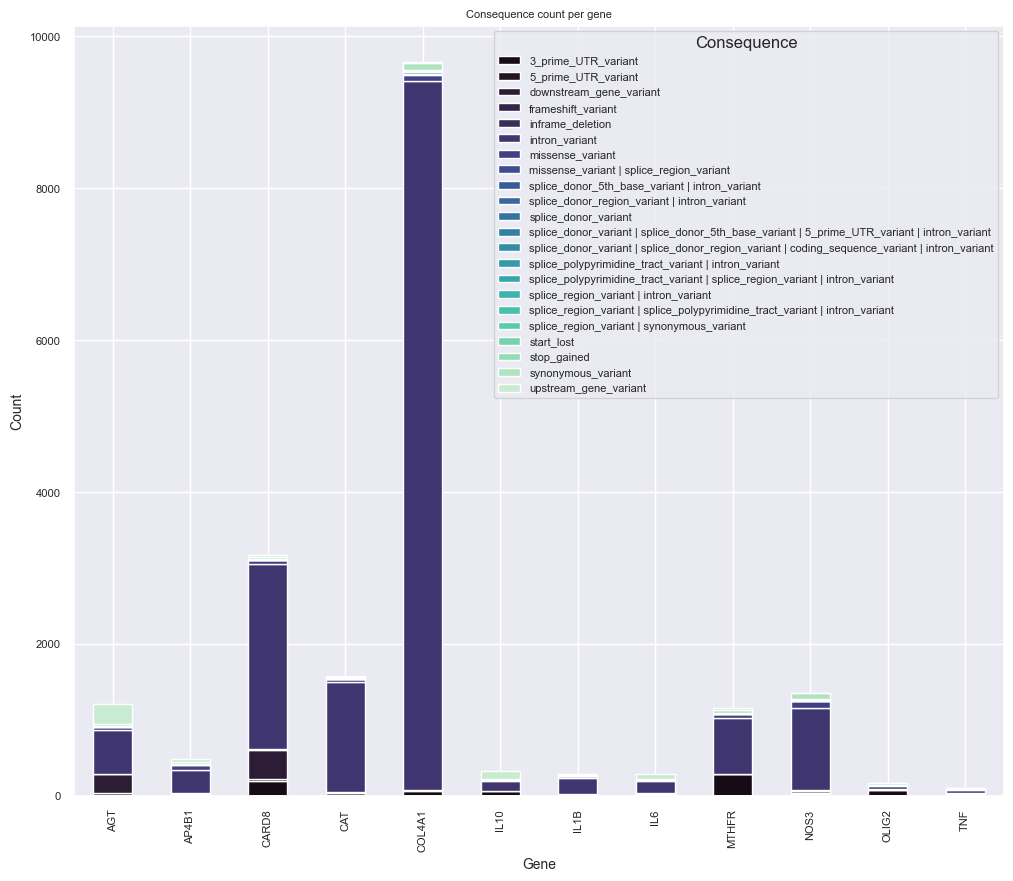

In [69]:
# Import variant consequence information for each gene and append to a single dataframe 

collated_VEP_data = pd.DataFrame()
for gene in genes:
    gene_VEP_path = os.path.join(home_path,"Data", "Supplementary Table", "SUPER", "{}_VEP.csv".format(gene))
    consequence_df = pd.DataFrame()
    if os.path.exists(gene_VEP_path):
        consequence_df = pd.read_csv(gene_VEP_path, sep="\t")[["ID", "POS", "REF", "ALT", "Consequence"]]
        consequence_df["GENE"] = gene
    collated_VEP_data = pd.concat([collated_VEP_data, consequence_df])

# Count unique variants for each gene and sub-population
collated_VEP_data_grouped = pd.DataFrame(collated_VEP_data.groupby(["GENE","Consequence"]).count()["ID"].reset_index().rename(columns={"ID":"COUNT"}))
collated_VEP_pivot = collated_VEP_data_grouped.pivot(index="GENE", columns="Consequence", values="COUNT")

# Create barplot
custom_palette = sns.color_palette("mako", 22)
consequence_plot = collated_VEP_pivot.plot(
    kind="bar",
    stacked = True,
    color=custom_palette,
)

consequence_plot.set_ylabel("Count")
consequence_plot.set_xlabel("Gene")

plt.title(label="Consequence count per gene")
plt.show()

## Generate scatter plot of predicted variant effect vs allele frequency

In [54]:
# Import allele frequency data
collated_af_data = pd.DataFrame()
for gene in genes:
    gene_af_path = os.path.join(home_path,"Data", "Supplementary Table", "SUPER", "{}_Freq.csv".format(gene))
    af_df = pd.DataFrame()
    if os.path.exists(gene_af_path):
        af_df = pd.read_csv(gene_af_path, sep="\t")[["ID", "POS", "REF", "ALT", "AFR"]]
        af_df["GENE"] = gene
        af_df = af_df.replace({af_df[af_df.AFR == 0.0].AFR.values[0]:np.NAN}) # Replace non-existant frequences (value of 0.0) with NaN
    collated_af_data = pd.concat([collated_af_data, af_df])

collated_af_data   


,ID,POS,REF,ALT,AFR,GENE
0,rs1185300901,110148882,C,CT,NaN,COL4A1
1,rs552586867,110148891,C,G,0.000662,COL4A1
2,rs59409892,110148917,C,G,0.097351,COL4A1
3,rs535182970,110148920,G,C,0.000662,COL4A1
4,rs56406633,110148959,A,G,0.000662,COL4A1
...,...,...,...,...,...,...
158,rs981058453,33029149,C,T,0.000662,OLIG2
159,rs182058038,33029193,T,A,0.005960,OLIG2
160,rs7278343,33029257,A,G,0.249669,OLIG2
161,rs151281307,33029262,AT,A,0.002649,OLIG2


In [55]:
# Import predictsnp2 data

collated_VEP_data = pd.DataFrame()
VEP_path = os.path.join(home_path,"Data", "PredictSNP2", "PredictSNP2_test.csv")
if os.path.exists(VEP_path):
    collated_VEP_data = pd.read_csv(VEP_path, sep=",")
collated_VEP_data[["REF","ALT"]] = collated_VEP_data["Alleles"].str.split("/", expand=True)

In [56]:
# Merge allele frequency and predictsnp2 dataframes by chromosome, position, reference and alternate allele

af_VEP_df = collated_af_data.merge(collated_VEP_data, on=["POS","REF","ALT"])
af_VEP_df = af_VEP_df.drop_duplicates(subset=["ID_x","POS","REF","ALT"])
af_VEP_df


,ID_x,POS,REF,ALT,AFR,GENE,ID_y,Type,Alleles,FUNC,...,PSNPS,CADDS,FATC,DANNE,FATE,DANNC,FUNE,GWAVAE,GWAVAS,GWAVAC
0,rs552586867,110148891,C,G,0.000662,COL4A1,.,SNV,C/G,downstream,...,-1.000000,2.258,0.77,neutral,neutral,0.82,.,neutral,0.30,0.68
1,rs59409892,110148917,C,G,0.097351,COL4A1,rs59409892,SNV,C/G,.,...,-0.319012,9.461,0.77,neutral,neutral,0.62,neutral,neutral,0.32,0.71
2,rs535182970,110148920,G,C,0.000662,COL4A1,.,SNV,G/C,downstream,...,-0.320755,9.779,0.75,neutral,neutral,0.65,?,neutral,0.32,0.71
3,rs56406633,110148959,A,G,0.000662,COL4A1,rs56406633,SNV,A/G,0.80,...,0.456207,13.690,0.82,neutral,deleterious,0.71,neutral,neutral,0.44,0.53
4,rs568536001,110148971,G,C,0.000662,COL4A1,.,SNV,G/C,downstream,...,-0.155078,6.450,0.91,neutral,deleterious,0.65,deleterious,neutral,0.44,0.53
5,rs537517944,110148981,C,A,NaN,COL4A1,.,SNV,C/A,0.49,...,-0.241833,6.074,0.76,neutral,deleterious,0.67,neutral,neutral,0.42,0.53
6,rs557357803,110149021,C,T,NaN,COL4A1,.,SNV,C/T,UTR3,...,-1.000000,2.218,0.89,neutral,neutral,0.79,neutral,neutral,0.42,0.53
7,rs900173832,110149022,G,A,NaN,COL4A1,.,SNV,G/A,0.80,...,-1.000000,1.137,0.75,neutral,neutral,0.85,deleterious,neutral,0.40,0.53
8,rs577157939,110149109,C,A,NaN,COL4A1,.,SNV,C/A,UTR3,...,0.446106,8.894,0.88,neutral,deleterious,0.72,deleterious,deleterious,0.52,0.67
9,.,110149124,C,T,NaN,COL4A1,.,SNV,C/T,0.74,...,1.000000,14.470,0.91,deleterious,deleterious,0.75,deleterious,deleterious,0.55,0.80


C:\Users\User\AppData\Local\Temp\ipykernel_17912\1670780396.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Local\Temp\ipykernel_17912\1670780396.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Local\Temp\ipykernel_17912\1670780396.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Local\Temp\ipykern

COL4A1
NOS3
IL6
IL1B
AGT
CAT
IL10
TNF
AP4B1
CARD8
MTHFR
OLIG2


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


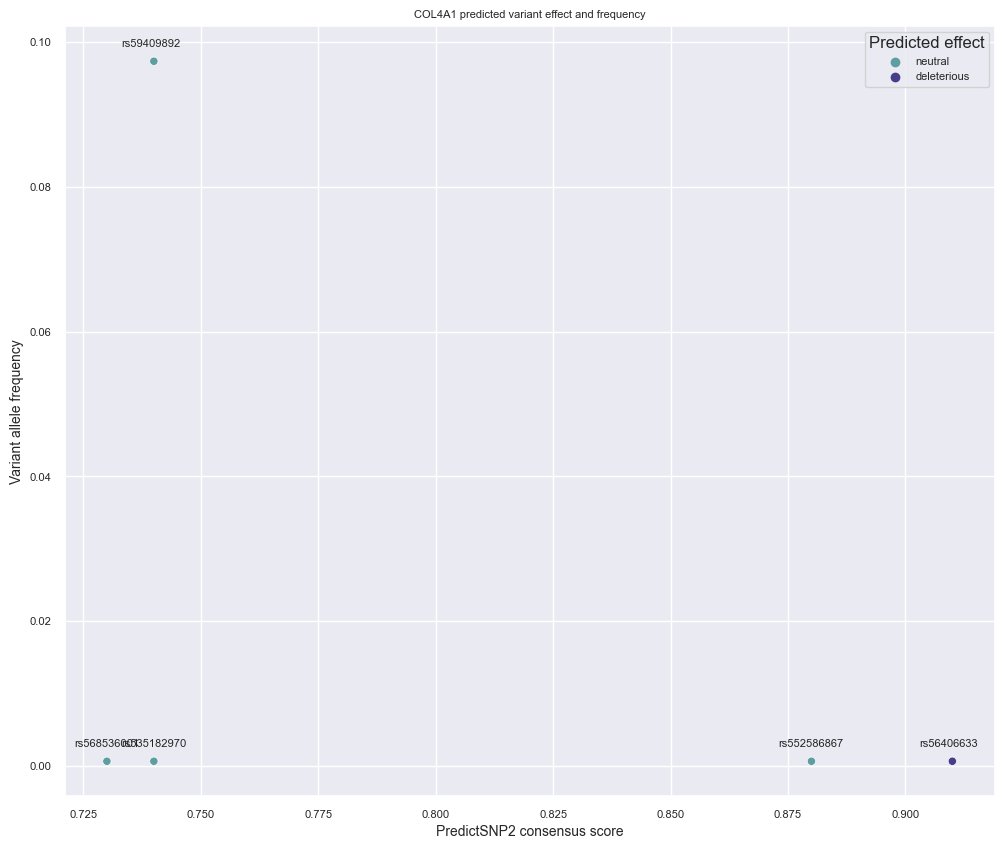

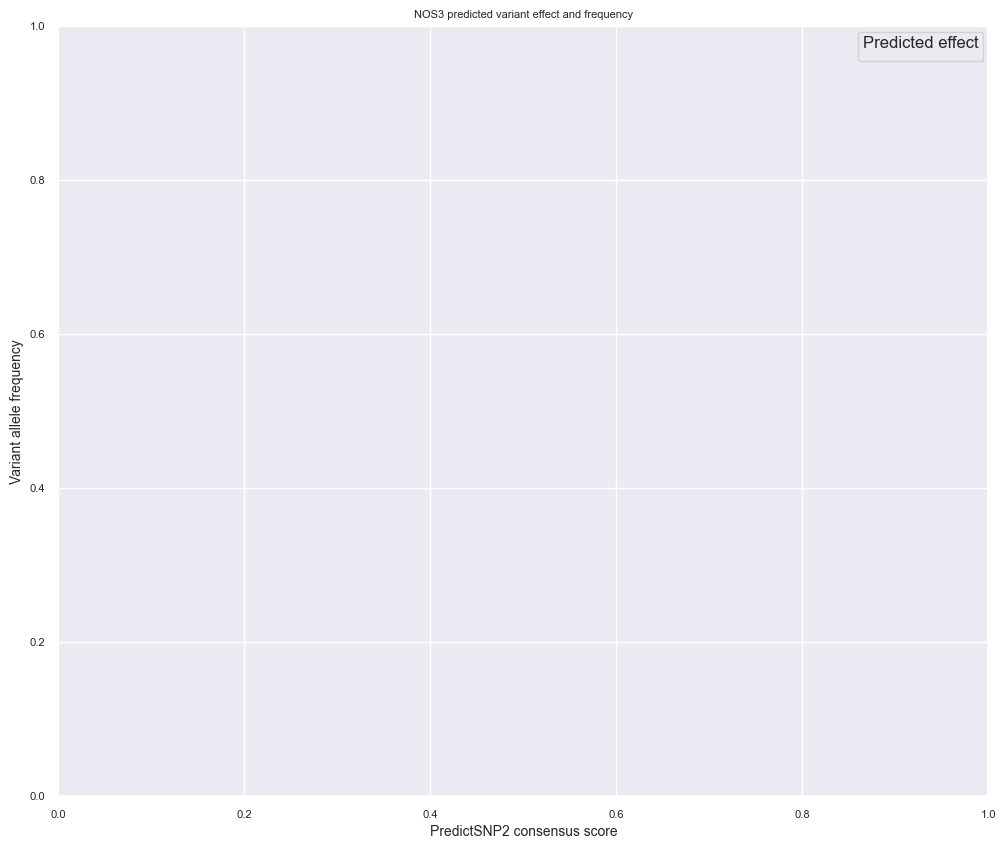

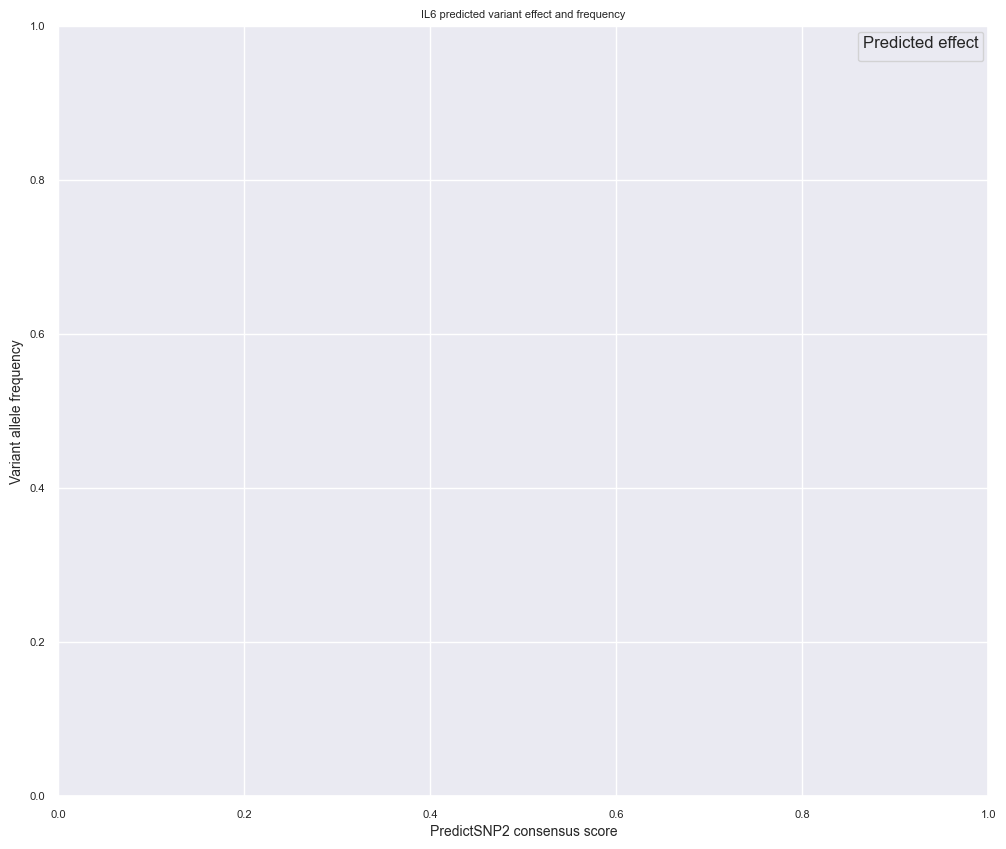

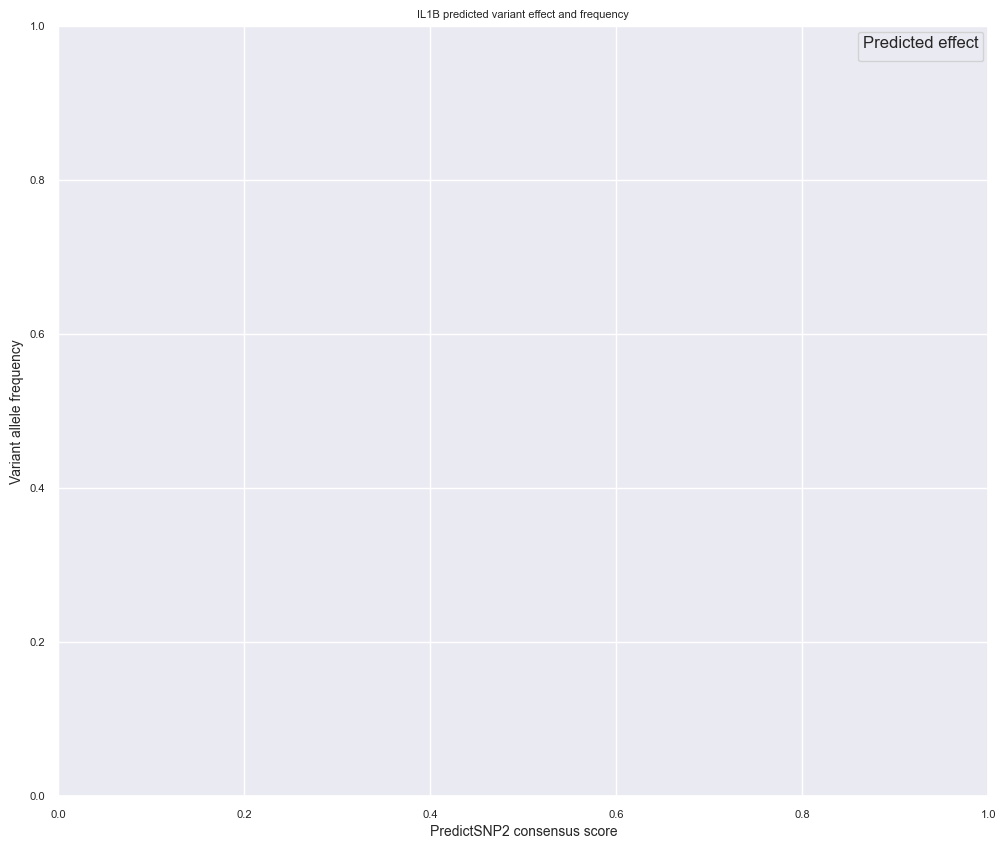

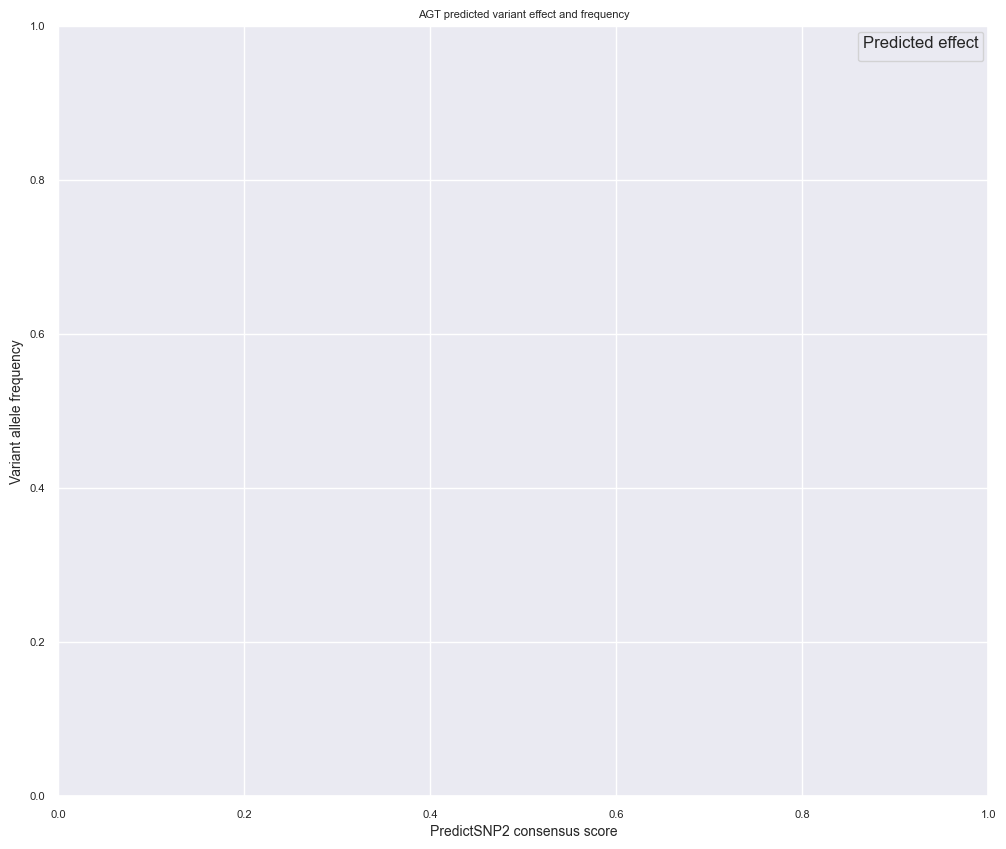

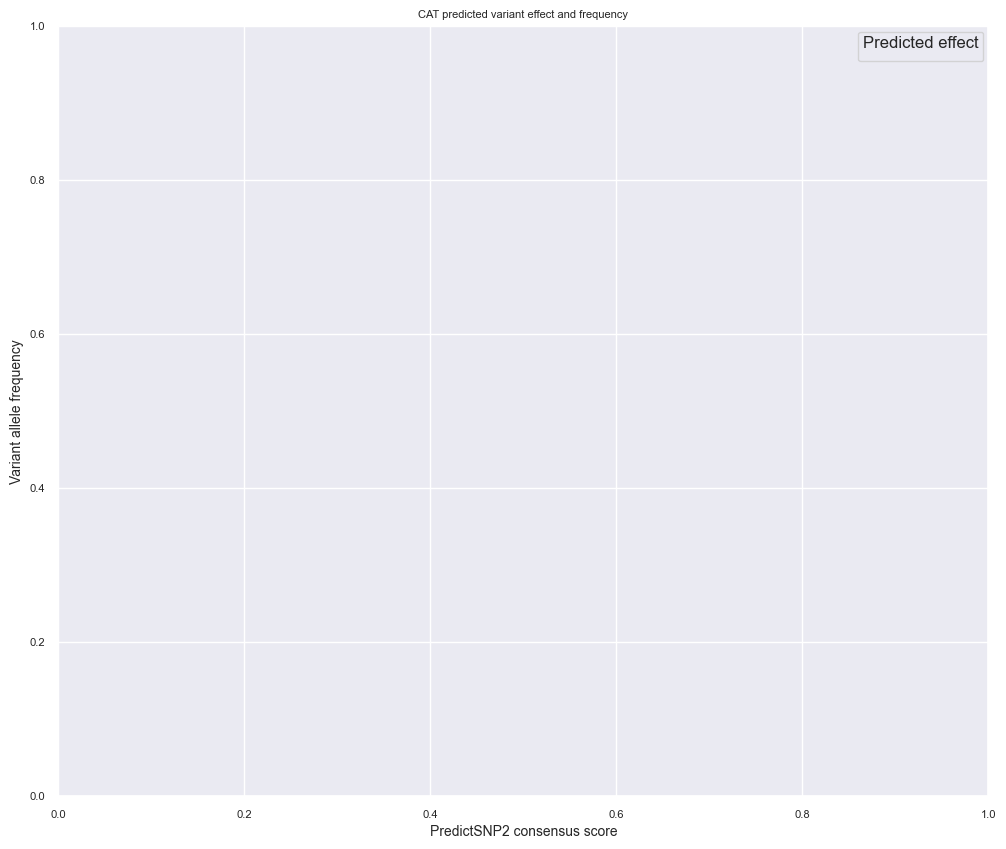

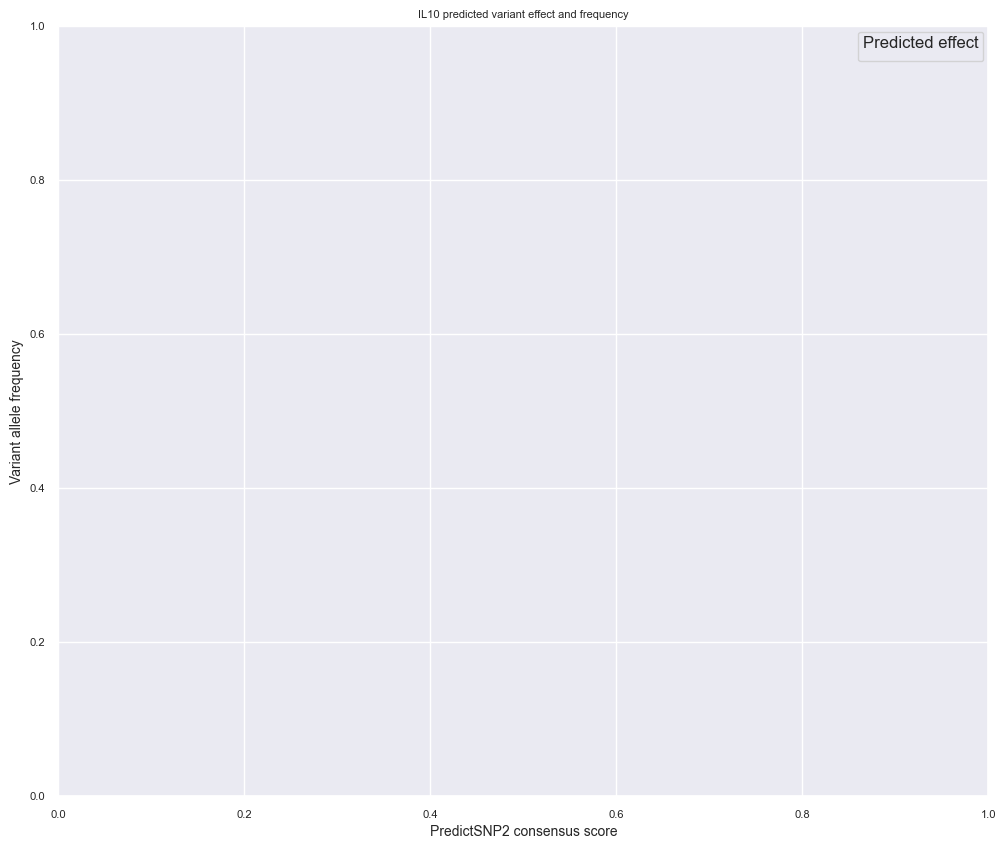

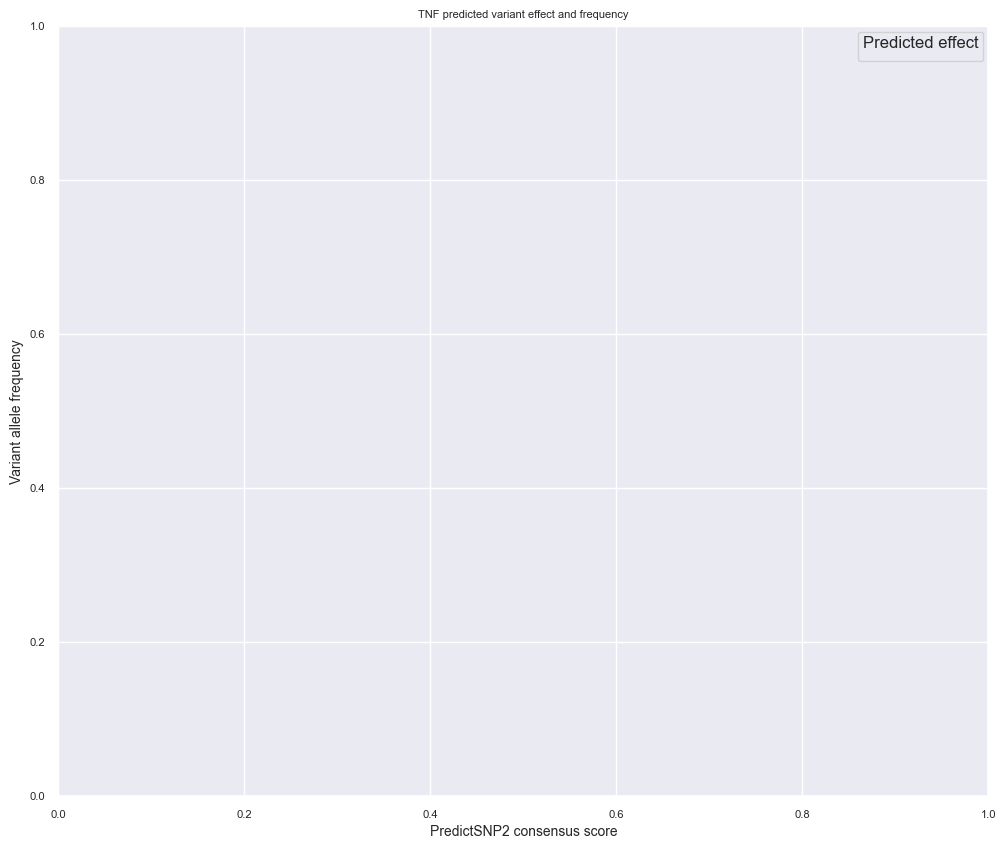

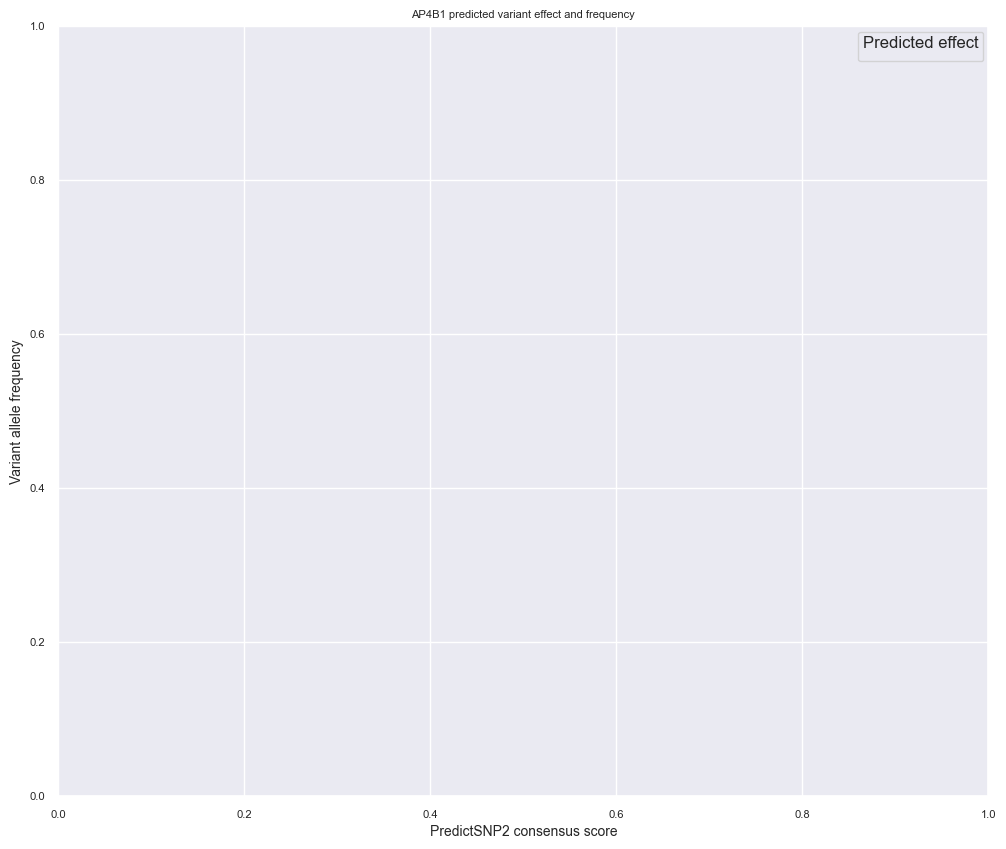

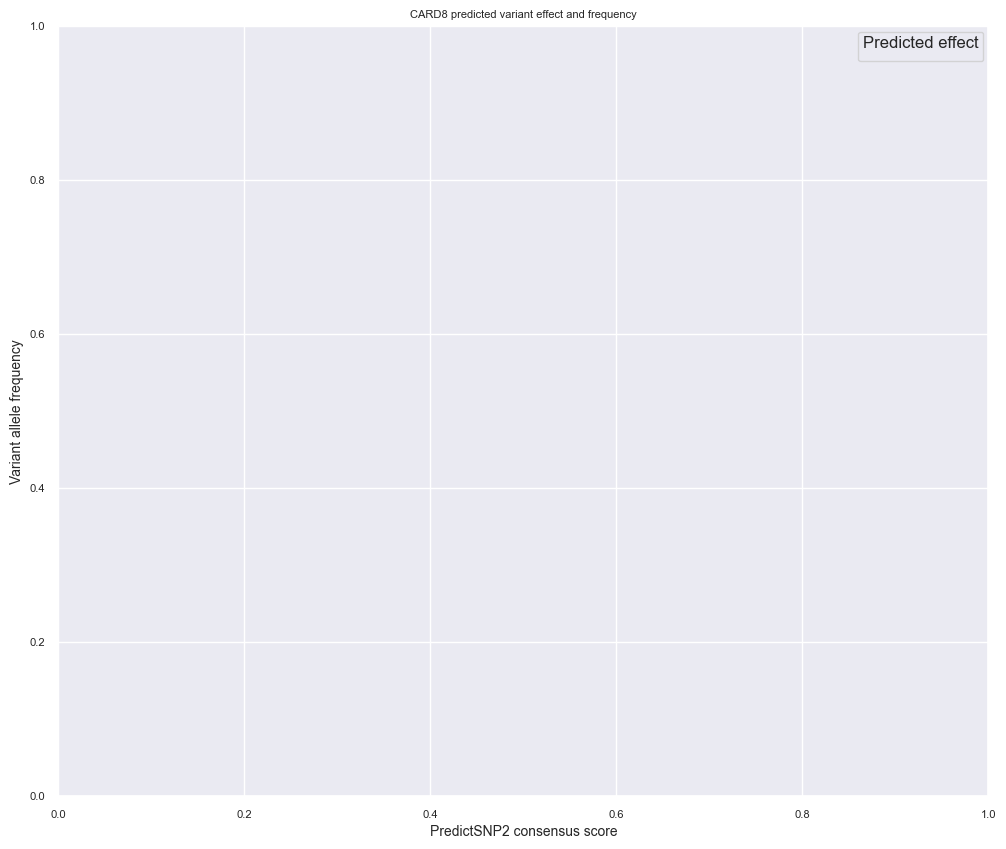

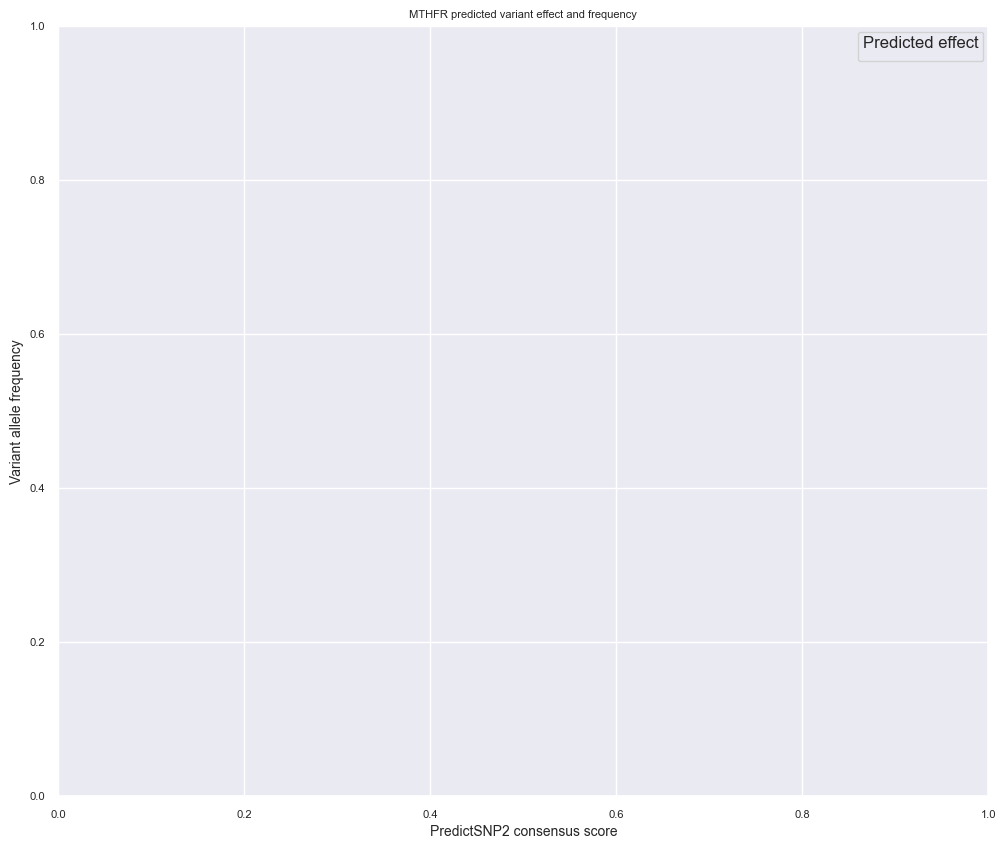

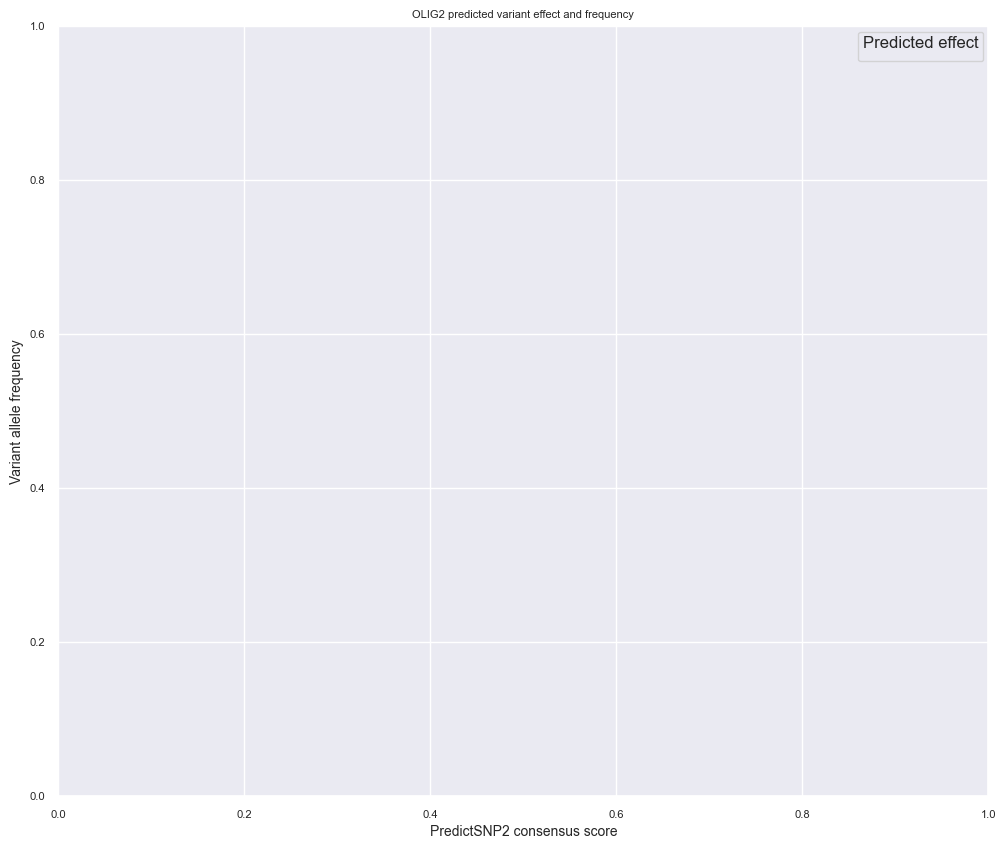

In [57]:
# Create scatter plot of predictsnp2 consensus VEP scores vs allele frequency for each gene

color_dict = dict({"neutral": "cadetblue", "deleterious": "darkslateblue"})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-0.007, point['y']+0.002, str(point['val']))

for gene in genes:
    print (gene)
    gene_af_VEP_df = af_VEP_df[af_VEP_df.GENE == gene]
    plt.figure()
    sns.scatterplot(
    x="PSNPC",
    y="AFR",
    hue="PSNPE",
    data=gene_af_VEP_df,
    palette=color_dict,
    legend="full",
    )

    plt.title(str(gene + " " "predicted variant effect and frequency"))
    plt.xlabel("PredictSNP2 consensus score")
    plt.ylabel("Variant allele frequency")
    plt.legend(
        title="Predicted effect",
        loc="upper right",
    )
    label_point(gene_af_VEP_df.PSNPC, gene_af_VEP_df.AFR, gene_af_VEP_df.ID_x, plt.gca())


## Generate a scatterplot comparing the allele frequencies of variants of interest for populations groups found in different African regions

C:\Users\User\AppData\Local\Temp\ipykernel_17912\2987969214.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  af_melt_regions = af_melt.groupby(["ID","REG"]).mean()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'rs1071676'),
  Text(1, 0, 'rs1217401'),
  Text(2, 0, 'rs1411040'),
  Text(3, 0, 'rs1476413'),
  Text(4, 0, 'rs1518111'),
  Text(5, 0, 'rs1554286'),
  Text(6, 0, 'rs1554606'),
  Text(7, 0, 'rs1800779'),
  Text(8, 0, 'rs1800795'),
  Text(9, 0, 'rs1800796'),
  Text(10, 0, 'rs1800871'),
  Text(11, 0, 'rs1800896'),
  Text(12, 0, 'rs1801131'),
  Text(13, 0, 'rs1801133'),
  Text(14, 0, 'rs1808593'),
  Text(15, 0, 'rs1961495'),
  Text(16, 0, 'rs2043211'),
  Text(17, 0, 'rs2066992'),
  Text(18, 0, 'rs2067853'),
  Text(19, 0, 'rs2069832'),
  Text(20, 0, 'rs2069833'),
  Text(21, 0, 'rs2069837'),
  Text(22, 0, 'rs2069845'),
  Text(23, 0, 'rs2070744'),
  Text(24, 0, 'rs3024490'),
  Text(25, 0, 'rs34004222'),
  Text(26, 0, 'rs4846049'),
  Text(27, 0, 'rs9651118')])

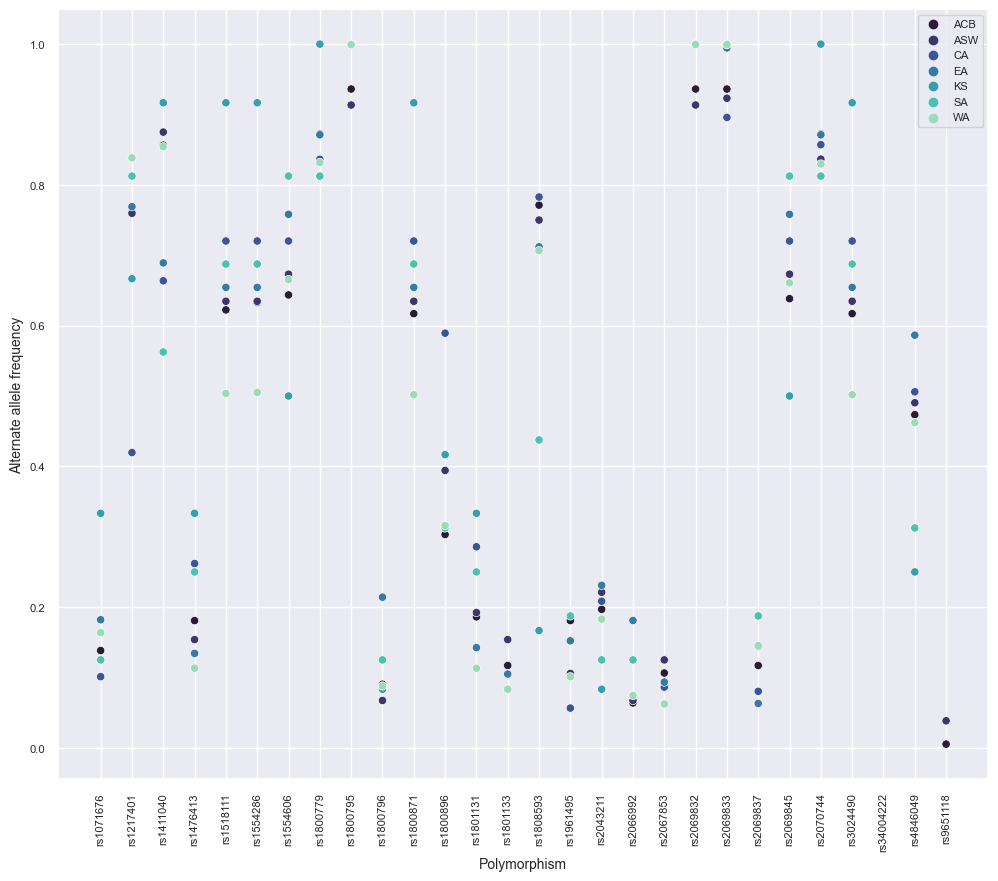

In [126]:
# Comparison of alternate allele frequencies for common variants across different sub-populations

# Create a list with variant IDs of interest
NESHIE_rsIDs = ["rs2067853","rs1217401","rs2043211","rs1001179","rs1961495","rs1411040","rs34004222","rs13027659","rs190148408","rs79704487","rs1800896","rs3024490","rs1800871","rs1554286","rs1518111","rs1143623","rs16944","rs1071676","rs1800795","rs2069837","rs1800796","rs2066992","rs2069832","rs2069833","rs1554606","rs2069845","rs1801133","rs4846049","rs1476413","rs1801131","rs9651118","rs1808593","rs2070744","rs1800779","rs6517135","rs1799964","rs1799724","rs361525","rs1800629"]

# Create a dataframe with merged sub-population allele frequency data

collated_af_data = pd.DataFrame()
for gene in genes:
    gene_af_path = os.path.join(home_path,"Data", "Supplementary Table", "SUB", "{}_Freq.csv".format(gene))
    af_df = pd.DataFrame()
    if os.path.exists(gene_af_path):
        af_df = pd.read_csv(gene_af_path, sep="\t")
        af_df["GENE"] = gene
        for sub_population in sub_populations:
            af_df = af_df.replace(0.0, np.NAN) # Replace non-existant frequencies (value of 0.0) with NaN
    collated_af_data = pd.concat([collated_af_data, af_df])

# Filter allele frequency data for variant entries of interest

af_subset = collated_af_data[collated_af_data.ID.isin(NESHIE_rsIDs)]

# Melt the allele frequency dataframe into a format suitable for plotting the allele frequency data

columns = ["ID","POS","REF","ALT","GENE"]
af_melt = af_subset.melt(id_vars=columns, value_vars=sub_populations, var_name="SUB_POP", value_name="ALT_AF")

# Add the regional classifications for each sub-populations to the table
af_melt["REG"] = af_melt["SUB_POP"].map(regional_classification)
af_melt_regions = af_melt.groupby(["ID","REG"]).mean() 


# Create scatterplot

custom_palette = sns.color_palette("mako", 7)
variant_barplot = sns.scatterplot(
    x="ID",
    y="ALT_AF",
    hue="REG",
    data=af_melt_regions,
    palette=custom_palette,
)

variant_barplot.set_ylabel("Alternate allele frequency")
variant_barplot.set_xlabel("Polymorphism")
plt.legend(loc="upper right")
plt.xticks(rotation=90)


## Create table of variant impact

In [124]:
# Generate a dataframe with PredictSNP2 variant effect predictions for each gene
af_VEP_subset = af_VEP_df[["ID_x","POS","REF","ALT","AFR","GENE","CADDE","FATE","DANNE","GWAVAE","FUNE"]]

# Score variants based on number of deleterious effect predictions
pd.options.mode.chained_assignment = None 
af_VEP_subset["VAR_IMPACT"] = af_VEP_subset.eq("deleterious").sum(axis=1)
af_VEP_subset

,ID_x,POS,REF,ALT,AFR,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
0,rs552586867,110148891,C,G,0.000662,COL4A1,neutral,neutral,neutral,neutral,.,0
1,rs59409892,110148917,C,G,0.097351,COL4A1,deleterious,neutral,neutral,neutral,neutral,1
2,rs535182970,110148920,G,C,0.000662,COL4A1,deleterious,neutral,neutral,neutral,?,1
3,rs56406633,110148959,A,G,0.000662,COL4A1,deleterious,deleterious,neutral,neutral,neutral,2
4,rs568536001,110148971,G,C,0.000662,COL4A1,neutral,deleterious,neutral,neutral,deleterious,2
5,rs537517944,110148981,C,A,NaN,COL4A1,neutral,deleterious,neutral,neutral,neutral,1
6,rs557357803,110149021,C,T,NaN,COL4A1,neutral,neutral,neutral,neutral,neutral,0
7,rs900173832,110149022,G,A,NaN,COL4A1,neutral,neutral,neutral,neutral,deleterious,1
8,rs577157939,110149109,C,A,NaN,COL4A1,deleterious,deleterious,neutral,deleterious,deleterious,4
9,.,110149124,C,T,NaN,COL4A1,deleterious,deleterious,deleterious,deleterious,deleterious,5


## Create a heatmap of variant frequency across different population groups

In [160]:
# Create a dataframe with allele frequency data in suitable format for heatmap
heatmap_af_data = collated_af_data.melt(id_vars=columns, value_vars=sub_populations, var_name="SUB_POP", value_name="ALT_AF")
heatmap_af_data = heatmap_af_data.drop_duplicates(["ID","SUB_POP"])
heatmap_af_data = heatmap_af_data.pivot(index="SUB_POP", columns=["ID"], values ="ALT_AF")

ID,.,rs1000071585,rs1000098382,rs1000148062,rs1000189640,rs1000343,rs1000483766,rs1000624771,rs1000640473,rs1000668511,...,rs998761948,rs998799040,rs998927772,rs999090440,rs999234482,rs999442182,rs999581914,rs999682913,rs999719985,rs999979532
SUB_POP,,,,,,,,,,,,,,,,,,,,,
ACB,NaN,NaN,NaN,NaN,NaN,0.101064,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASW,NaN,NaN,NaN,NaN,NaN,0.115385,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,NaN
BantuKenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BantuSouthAfrica,NaN,NaN,NaN,NaN,NaN,0.062500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BiakaPygmy,NaN,NaN,NaN,NaN,NaN,0.023810,NaN,NaN,NaN,NaN,...,0.025,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESN,NaN,NaN,NaN,NaN,NaN,0.072816,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GWD,NaN,NaN,NaN,NaN,NaN,0.056034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00431,NaN,NaN,NaN
LWK,NaN,NaN,NaN,NaN,NaN,0.048913,0.005435,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01087
MSL,NaN,NaN,NaN,NaN,NaN,0.138554,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.017241,NaN,NaN,NaN,NaN
